# Data Projects - Stock Market Analysis

Welcome to your second data project! In this portfolio project we will be looking at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Monte Carlo method!

We'll be answering the following questions along the way:

1. What was the change in price of the stock over time?
2. What was the daily return of the stock on average?
3. What was the moving average of the various stocks?
4. What was the correlation between different stocks' closing prices?
4. What was the correlation between different stocks' daily returns?
5. How much value do we put at risk by investing in a particular stock?
6. How can we attempt to predict future stock behavior?

In [3]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [5]:
from pandas.io.data import DataReader

In [8]:
from datetime import datetime

In [9]:
from __future__ import division

In [10]:
tech_list = ['AAPL','GOOG', 'MSFT', 'AMZN']

In [11]:
end = datetime.now()

start = datetime(end.year - 1, end.month, end.day)

In [13]:
for stock in tech_list:
    globals()[stock] = DataReader(stock, 'yahoo', start, end) #globals takes string and changes it to a global variable

In [15]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,118.448611,119.542302,117.213413,118.363175,5.389285e+07,117.386634
std,9.695924,9.490824,9.742041,9.604363,2.127249e+07,9.819107
min,94.870003,97.720001,92.000000,96.260002,1.447960e+07,94.642124
25%,111.780001,112.695000,109.697500,111.740000,3.968435e+07,110.375866
50%,118.680001,119.914997,117.720001,118.930000,4.876215e+07,117.704435
75%,127.142502,127.907497,125.982502,126.912502,6.269118e+07,126.029532
max,134.460007,134.539993,131.399994,133.000000,1.622063e+08,131.942761


In [16]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2014-09-23 00:00:00 to 2015-09-22 00:00:00
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


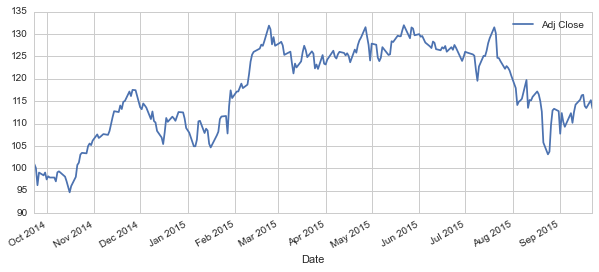

In [17]:
AAPL['Adj Close'].plot(legend=True, figsize = (10,4))

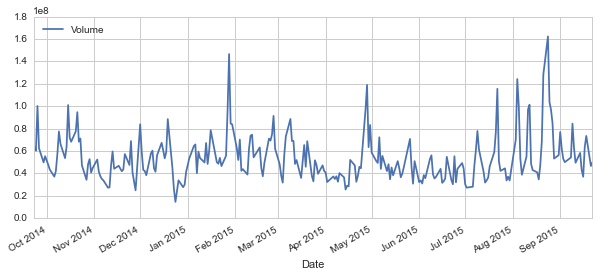

In [18]:
AAPL['Volume'].plot(legend = True, figsize = (10,4))

In [19]:
# Calculating moving average for 10, 20 and 50 days

ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'],ma)

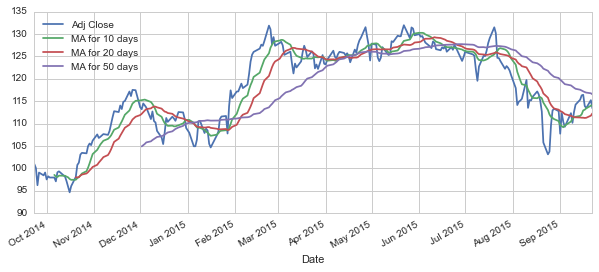

In [22]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False, figsize=(10,4))

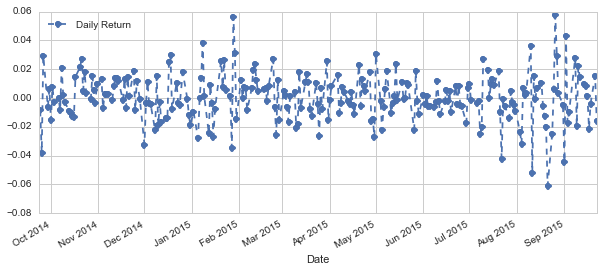

In [23]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize = (10,4), legend=True, linestyle ='--', marker='o')

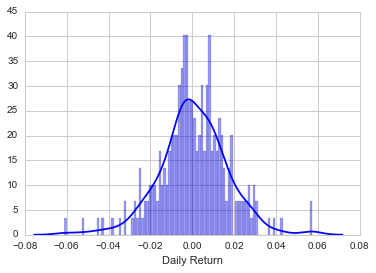

In [25]:
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, color = 'blue')

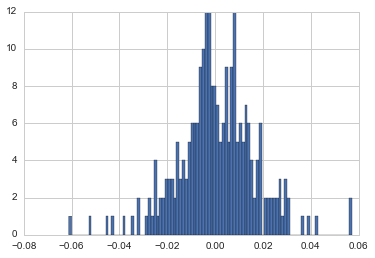

In [26]:
AAPL['Daily Return'].hist(bins = 100)

In [27]:
closing_df = DataReader(tech_list, 'yahoo', start,end)['Adj Close']

In [28]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2014-09-23,100.914890,323.630005,581.132634,45.345566
2014-09-24,100.039849,328.209991,587.992634,45.852003
2014-09-25,96.225065,321.929993,575.062581,44.839129
2014-09-26,99.056657,323.209991,577.102600,45.199477
2014-09-29,98.427414,321.820007,576.362594,45.228693


In [29]:
tech_rets = closing_df.pct_change()

In [30]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2014-09-23,NaN,NaN,NaN,NaN
2014-09-24,-0.008671,0.014152,0.011805,0.011168
2014-09-25,-0.038133,-0.019134,-0.021990,-0.022090
2014-09-26,0.029427,0.003976,0.003547,0.008036
2014-09-29,-0.006352,-0.004301,-0.001282,0.000646


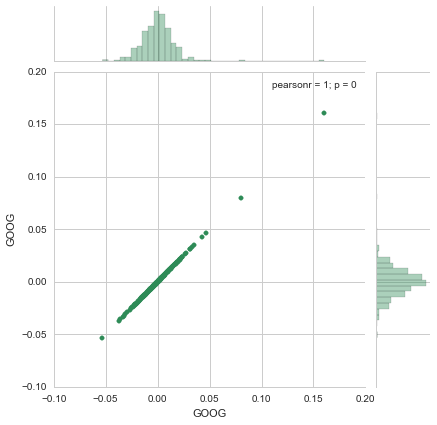

In [31]:
sns.jointplot('GOOG','GOOG',tech_rets,kind = 'scatter', color = 'seagreen')

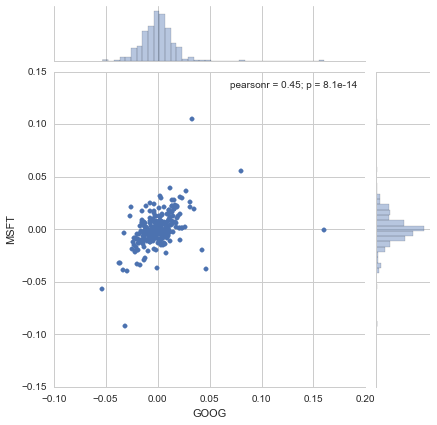

In [32]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind = 'scatter')

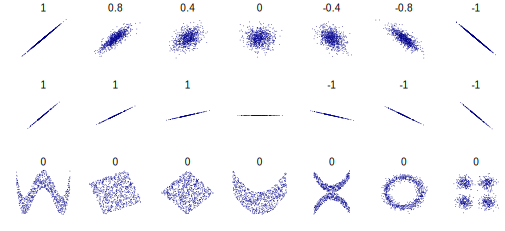

In [33]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

In [34]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2014-09-23,NaN,NaN,NaN,NaN
2014-09-24,-0.008671,0.014152,0.011805,0.011168
2014-09-25,-0.038133,-0.019134,-0.021990,-0.022090
2014-09-26,0.029427,0.003976,0.003547,0.008036
2014-09-29,-0.006352,-0.004301,-0.001282,0.000646


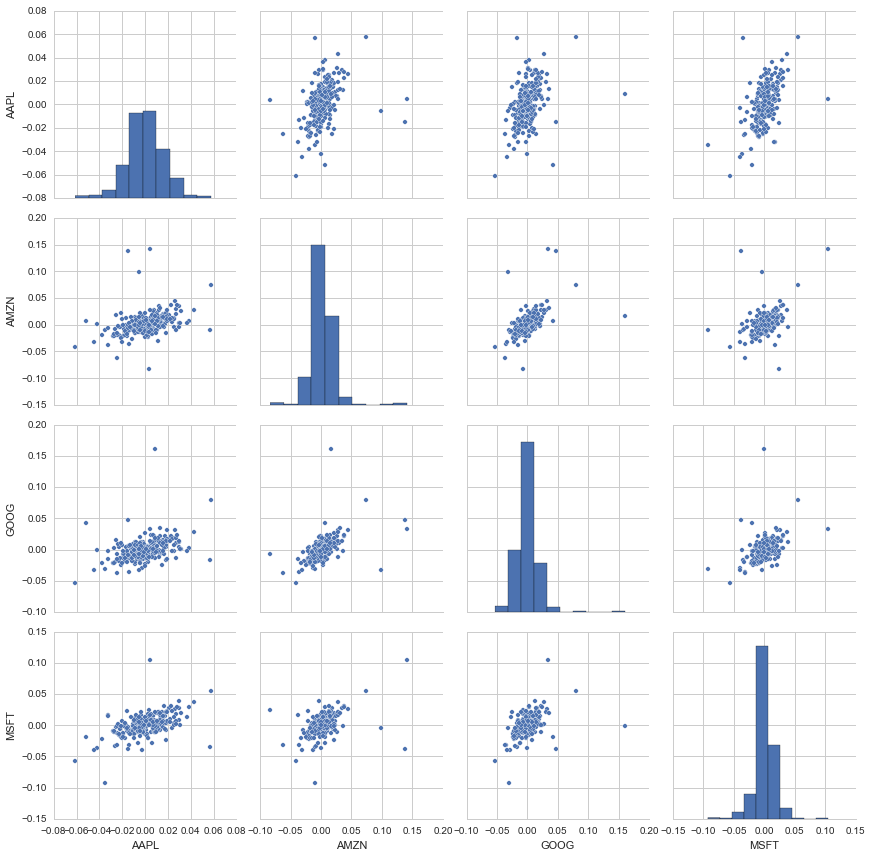

In [35]:
sns.pairplot(tech_rets.dropna())

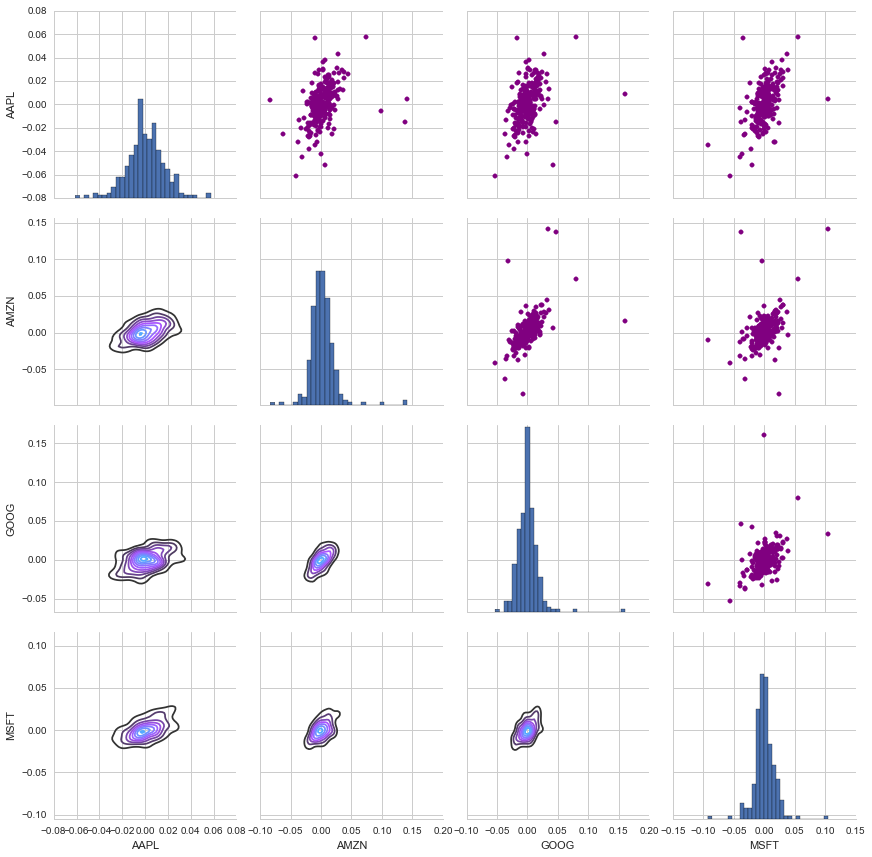

In [36]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter, color = 'purple')

returns_fig.map_lower(sns.kdeplot, cmap = 'cool_d')

returns_fig.map_diag(plt.hist, bins = 30)

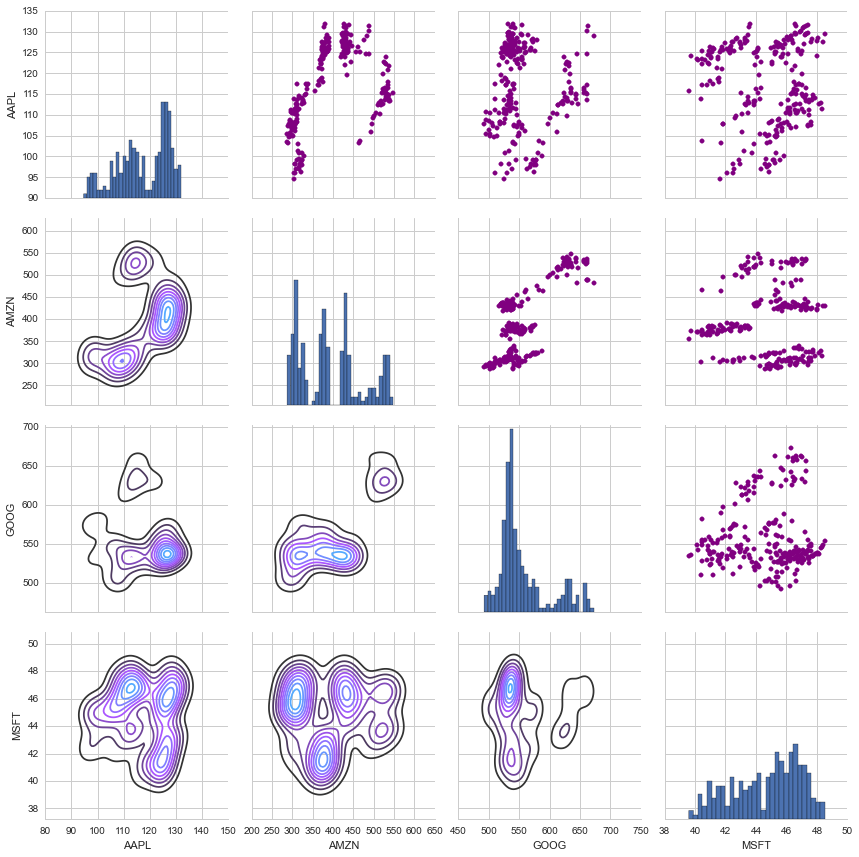

In [37]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)

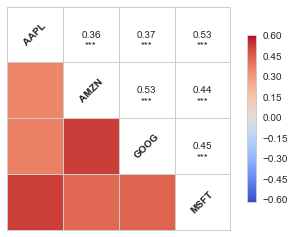

In [38]:
sns.corrplot(tech_rets.dropna(), annot = True)

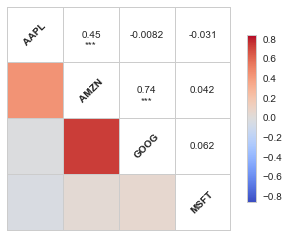

In [39]:
sns.corrplot(closing_df, annot = True)

In [40]:
rets = tech_rets.dropna()

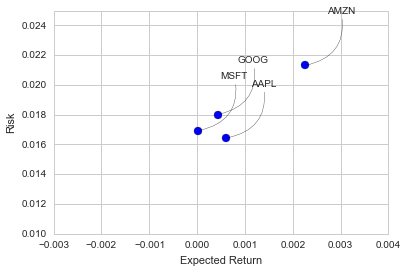

In [44]:
area = np.pi*20

plt.scatter(rets.mean(), rets.std(), s = area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

plt.xlabel('Expected Return')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.5'))